In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
import torch.nn.functional as F
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle
import pdb
import time

from utils import *

# Jester

Balance train validation set

In [5]:
# Jester data: 171019-171023, 180711-180715 (minus bad dates 171019, 180715 = 8 dates)
val_dates = ['171020','180712']
test_dates = ['180711','171022']
bad_dates = ['180326', '180328', '171019', '180715', '180716', '180717']
load_path = '/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Jester_all_10s_2/'
test_imbalance(load_path, val_dates, test_dates, bad_dates, test_train=True)

val dates: ['171020', '180712'], test dates: ['180711', '171022']
val instances: 2610, val imbalance: 0.784674346446991
test instances: 2689, test imbalance: 0.7761249542236328
train instances: 12260, train imbalance: 0.5


Train model

In [14]:
CH = 'all'
device = torch.device('cuda')
val_dates = ['171020','180712']
test_dates = ['180711','171022']
bad_dates = ['180326', '180328', '171019', '180715', '180716', '180717']
#load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/'
load_path = '/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Jester_all_10s_2/'
# save_path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_2_upsample'
save_path = '/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Jester_all_10s_2/Jester_ANN_models'
model_name = 'MLP_all_ch_Drop_03'

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files, load_path, batch_size=128)

In [15]:
len(train_loader), len(val_loader), len(test_loader)

(96, 21, 22)

In [16]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([128, 62, 100, 10])
torch.Size([128, 1])
128
128
128


date:180714, rec:004, time:2589.0, label:1.0
date:180713, rec:002, time:467.0, label:0.0


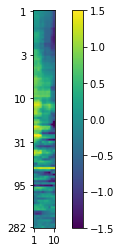

date:171023, rec:005, time:620.0, label:1.0
date:171023, rec:005, time:2920.0, label:1.0
date:171023, rec:005, time:2690.0, label:1.0
date:180713, rec:001, time:5669.0, label:0.0


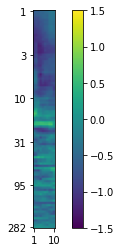

date:180714, rec:004, time:3681.0, label:1.0
date:180713, rec:007, time:3614.0, label:1.0
date:180713, rec:009, time:6335.0, label:0.0


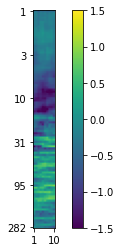

date:180713, rec:009, time:1528.0, label:1.0
date:180713, rec:001, time:3038.0, label:0.0


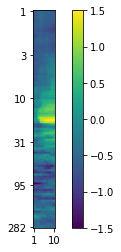

date:171023, rec:007, time:1256.0, label:0.0


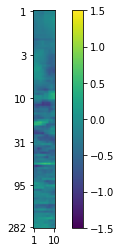

date:171023, rec:005, time:4216.0, label:0.0


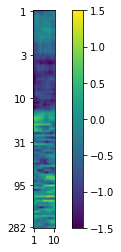

date:180713, rec:001, time:3078.0, label:0.0


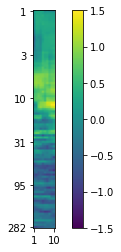

date:171021, rec:001, time:4804.0, label:1.0
date:180713, rec:006, time:4478.0, label:1.0
date:180713, rec:001, time:5971.0, label:1.0
date:171021, rec:004, time:1398.0, label:1.0
date:180713, rec:009, time:6756.0, label:0.0


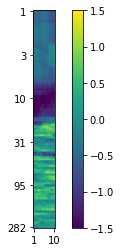

date:171023, rec:007, time:1276.0, label:0.0


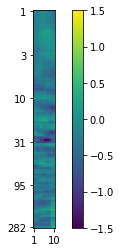

date:180713, rec:001, time:2308.0, label:0.0


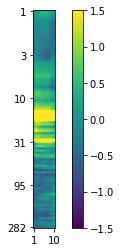

date:180713, rec:001, time:3578.0, label:0.0


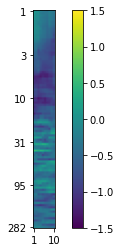

date:180714, rec:006, time:3204.0, label:0.0


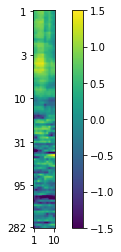

date:180713, rec:007, time:6175.0, label:1.0
date:180713, rec:008, time:6978.0, label:1.0
date:180713, rec:001, time:7032.0, label:0.0


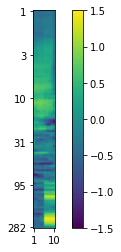

date:180714, rec:005, time:4000.0, label:1.0
date:180713, rec:001, time:670.0, label:0.0


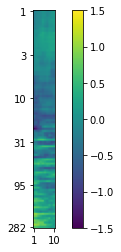

date:180713, rec:001, time:460.0, label:0.0


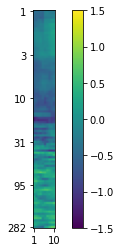

date:171021, rec:001, time:5706.0, label:1.0
date:180714, rec:004, time:457.0, label:1.0
date:180714, rec:006, time:3204.0, label:0.0


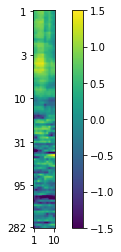

date:171023, rec:005, time:6612.0, label:1.0
date:180713, rec:006, time:1521.0, label:1.0
date:171023, rec:007, time:6653.0, label:0.0


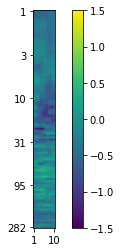

date:171023, rec:007, time:4666.0, label:0.0


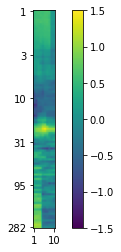

date:180713, rec:001, time:2148.0, label:0.0


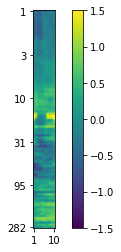

date:180713, rec:009, time:6876.0, label:0.0


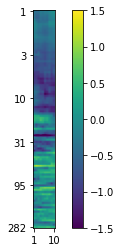

date:171021, rec:006, time:512.0, label:0.0


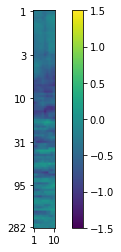

date:171021, rec:006, time:605.0, label:1.0
date:180713, rec:006, time:1071.0, label:1.0
date:180713, rec:001, time:3538.0, label:0.0


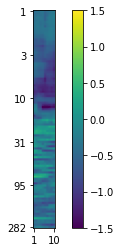

date:171023, rec:006, time:1420.0, label:1.0
date:180713, rec:009, time:3695.0, label:1.0
date:171023, rec:005, time:3270.0, label:1.0
date:180714, rec:004, time:2389.0, label:1.0
date:180713, rec:001, time:3108.0, label:0.0


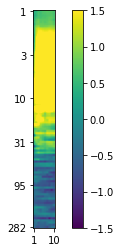

date:180713, rec:002, time:2938.0, label:1.0
date:180713, rec:001, time:6852.0, label:0.0


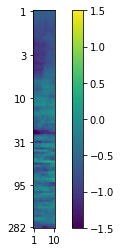

date:171023, rec:007, time:6693.0, label:0.0


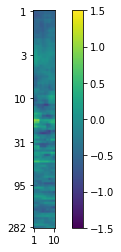

date:180713, rec:001, time:3168.0, label:0.0


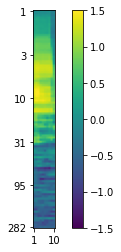

date:171021, rec:004, time:2554.0, label:1.0
date:180713, rec:002, time:7160.0, label:1.0
date:180713, rec:002, time:2448.0, label:1.0
date:171021, rec:005, time:6068.0, label:1.0
date:171021, rec:004, time:6650.0, label:0.0


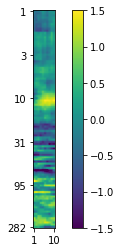

date:180713, rec:006, time:3374.0, label:1.0
date:180713, rec:009, time:5975.0, label:0.0


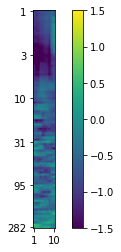

date:180713, rec:001, time:2148.0, label:0.0


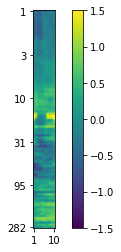

date:180713, rec:006, time:1451.0, label:1.0
date:171023, rec:007, time:4556.0, label:0.0


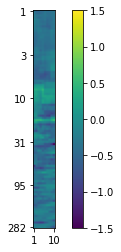

date:171023, rec:005, time:500.0, label:1.0
date:180713, rec:007, time:2286.0, label:1.0
date:171021, rec:001, time:2089.0, label:0.0


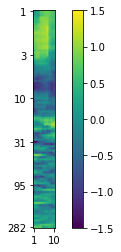

date:180713, rec:009, time:280.0, label:1.0
date:180714, rec:005, time:1763.0, label:0.0


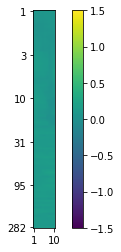

date:180714, rec:004, time:3731.0, label:1.0
date:171021, rec:001, time:2049.0, label:0.0


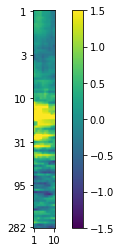

date:180713, rec:009, time:6996.0, label:0.0


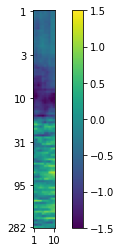

date:180713, rec:006, time:3294.0, label:1.0
date:180713, rec:008, time:1315.0, label:1.0
date:180714, rec:004, time:4291.0, label:1.0
date:180713, rec:009, time:2200.0, label:1.0
date:180713, rec:008, time:1245.0, label:1.0
date:171021, rec:006, time:532.0, label:0.0


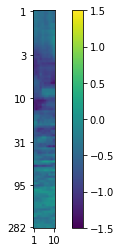

date:171021, rec:004, time:1508.0, label:1.0
date:180713, rec:006, time:2384.0, label:1.0
date:180713, rec:009, time:6806.0, label:0.0


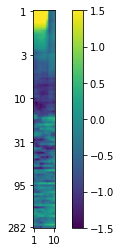

date:180714, rec:006, time:6796.0, label:0.0


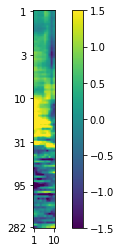

date:180713, rec:002, time:3902.0, label:1.0
date:180714, rec:004, time:1951.0, label:1.0
date:180713, rec:001, time:1928.0, label:0.0


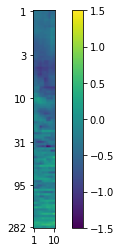

date:180714, rec:004, time:3571.0, label:1.0
date:171021, rec:006, time:1935.0, label:1.0
date:171023, rec:007, time:4586.0, label:0.0


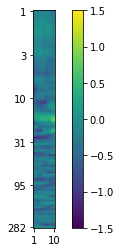

date:180714, rec:004, time:1250.0, label:1.0
date:171021, rec:004, time:5973.0, label:1.0
date:180713, rec:001, time:2938.0, label:0.0


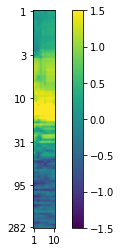

date:180713, rec:002, time:7000.0, label:1.0
date:180713, rec:001, time:5242.0, label:0.0


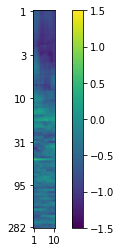

date:171021, rec:001, time:2049.0, label:0.0


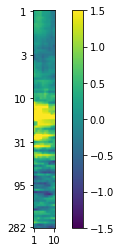

date:171021, rec:005, time:6480.0, label:1.0
date:180713, rec:001, time:1090.0, label:0.0


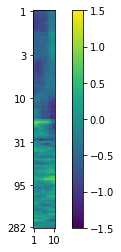

date:171023, rec:003, time:2196.0, label:1.0
date:180714, rec:006, time:6596.0, label:0.0


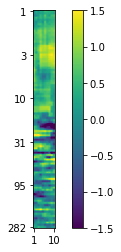

date:180714, rec:006, time:3264.0, label:0.0


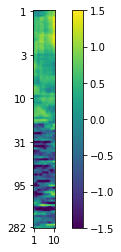

date:171021, rec:001, time:3990.0, label:0.0


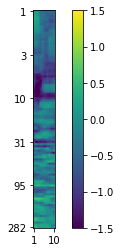

date:171023, rec:005, time:5590.0, label:1.0
date:180714, rec:005, time:2041.0, label:1.0
date:180714, rec:004, time:1495.0, label:0.0


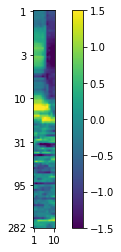

date:180714, rec:004, time:1731.0, label:1.0
date:180714, rec:004, time:1270.0, label:1.0
date:180714, rec:006, time:6466.0, label:0.0


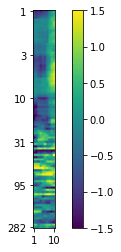

date:180713, rec:001, time:6662.0, label:0.0


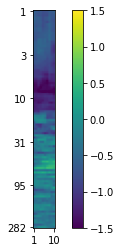

date:171023, rec:007, time:4716.0, label:0.0


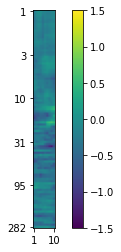

date:180714, rec:005, time:3570.0, label:1.0
date:180713, rec:001, time:1928.0, label:0.0


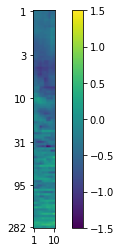

date:180713, rec:008, time:2195.0, label:1.0
date:180713, rec:002, time:5012.0, label:1.0
date:171021, rec:004, time:3614.0, label:1.0
date:171023, rec:007, time:6653.0, label:0.0


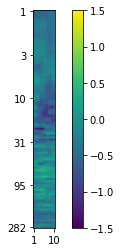

date:180713, rec:001, time:2608.0, label:0.0


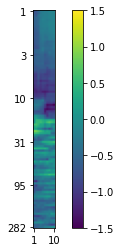

date:180713, rec:008, time:3809.0, label:1.0
date:180713, rec:001, time:1140.0, label:0.0


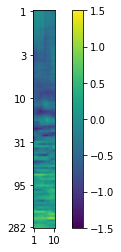

date:180713, rec:001, time:7022.0, label:0.0


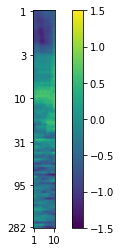

date:180713, rec:001, time:6662.0, label:0.0


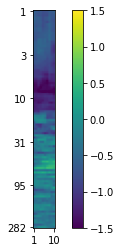

date:180713, rec:001, time:5484.0, label:1.0
date:171023, rec:006, time:2480.0, label:1.0
date:180713, rec:001, time:400.0, label:0.0


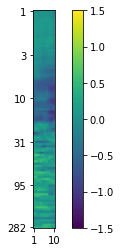

date:171023, rec:007, time:6263.0, label:0.0


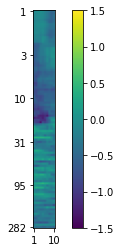

date:180713, rec:001, time:5372.0, label:0.0


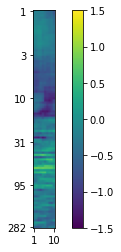

date:171023, rec:005, time:2253.0, label:1.0
date:180714, rec:006, time:6916.0, label:0.0


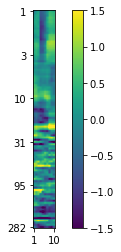

date:171023, rec:005, time:3330.0, label:1.0
date:171023, rec:005, time:780.0, label:1.0
date:180713, rec:001, time:6139.0, label:0.0


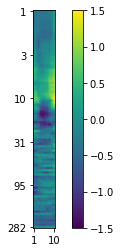

date:171023, rec:004, time:5467.0, label:0.0


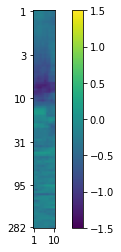

date:180713, rec:009, time:1066.0, label:1.0


In [17]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}, label:{}'.format(date[i], rec[i], time[i], label[i][0].numpy()))
        if label[i][0].numpy() == 0.0:
            data_sub = data[i][0]
            plt.yticks(ticks=[0, 20, 40, 60, 80, 99], labels=[round(np.logspace(0, 2.45, 100)[i]) for i in [0, 20, 40, 60, 80, 99]])
            plt.xticks(ticks=[0, 9], labels=[1, 10])
            plt.imshow(data_sub)
            plt.clim(-1.5, 1.5)
            plt.colorbar()
            plt.show()
    break

In [18]:
class MLP(nn.Module): # add dropo
    def __init__(self, input_dim=100*10*62, output_dim=1, embed_dim=256,drop_prob=0.):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_dim, embed_dim)
        self.linear2 = nn.Linear(embed_dim, output_dim)
        self.dropout = nn.Dropout(drop_prob)
        
    def forward(self, x):
        
        x = x.reshape([x.shape[0], 1, -1]).float()
        x = self.dropout(F.relu(self.linear1(x)))
        outputs = self.linear2(x)
        
        return outputs

In [19]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0
model_type = 'MLP'
loss_type = 'bce'
reg_type = 'none'
input_dim = 62*10*100
embed_dim = 256

dropout_all = [0, 0.1,0.3,0.5,0.7,0.9,1]





dropout:  0
Train loss for epoch 0: 11.995232582092285
Val loss for epoch 0: 3.0132250785827637
Train loss for epoch 1: 9.22623062133789
Val loss for epoch 1: 2.4049761295318604
1
Train loss for epoch 2: 7.65524435043335
Val loss for epoch 2: 2.1336801052093506
2
Train loss for epoch 3: 3.8106234073638916
Val loss for epoch 3: 1.379595160484314
3
Train loss for epoch 4: 0.9888994097709656
Val loss for epoch 4: 0.4547955393791199
4
Train loss for epoch 5: 0.37988799810409546
Val loss for epoch 5: 0.5413206219673157
Train loss for epoch 6: 0.24473291635513306
Val loss for epoch 6: 0.5036572217941284
Train loss for epoch 7: 0.20507659018039703
Val loss for epoch 7: 0.44183388352394104
7
Train loss for epoch 8: 0.19435662031173706
Val loss for epoch 8: 0.5889569520950317
Train loss for epoch 9: 0.18792255222797394
Val loss for epoch 9: 0.5526083111763
Train loss for epoch 10: 0.1874193698167801
Val loss for epoch 10: 0.6636406183242798
Train loss for epoch 11: 0.19125978648662567
Val loss 

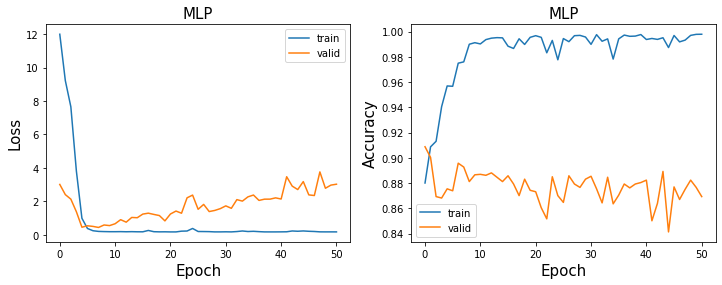

dropout:  0.1
Train loss for epoch 0: 10.17647647857666
Val loss for epoch 0: 1.9536890983581543
Train loss for epoch 1: 5.093509674072266
Val loss for epoch 1: 1.440030813217163
1
Train loss for epoch 2: 1.4781930446624756
Val loss for epoch 2: 0.40032875537872314
2
Train loss for epoch 3: 0.25890445709228516
Val loss for epoch 3: 0.3479691743850708
3
Train loss for epoch 4: 0.1077038124203682
Val loss for epoch 4: 0.3726794421672821
Train loss for epoch 5: 0.07936340570449829
Val loss for epoch 5: 0.3984518349170685
Train loss for epoch 6: 0.07074219733476639
Val loss for epoch 6: 0.5321343541145325
Train loss for epoch 7: 0.07962728291749954
Val loss for epoch 7: 0.5172459483146667
Train loss for epoch 8: 0.12320570647716522
Val loss for epoch 8: 0.5379467606544495
Train loss for epoch 9: 0.05715138837695122
Val loss for epoch 9: 0.5437108874320984
Train loss for epoch 10: 0.036820657551288605
Val loss for epoch 10: 0.5276038646697998
Train loss for epoch 11: 0.04308827966451645
Val

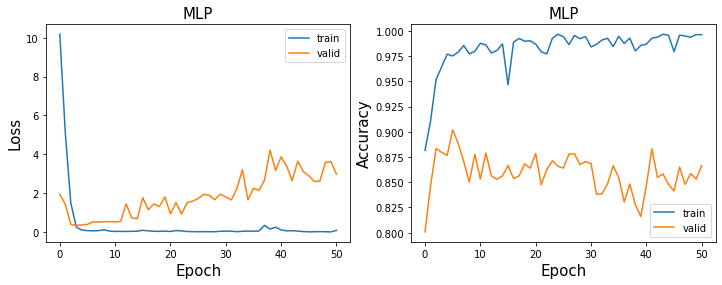

dropout:  0.3
Train loss for epoch 0: 10.680115699768066
Val loss for epoch 0: 1.7120040655136108
Train loss for epoch 1: 4.638016223907471
Val loss for epoch 1: 1.0479179620742798
1
Train loss for epoch 2: 1.594313621520996
Val loss for epoch 2: 0.7060202360153198
2
Train loss for epoch 3: 0.9632273316383362
Val loss for epoch 3: 0.3812320828437805
3
Train loss for epoch 4: 0.3119529187679291
Val loss for epoch 4: 0.37550482153892517
4
Train loss for epoch 5: 0.11916927993297577
Val loss for epoch 5: 0.3674295246601105
5
Train loss for epoch 6: 0.0981287807226181
Val loss for epoch 6: 0.4231143593788147
Train loss for epoch 7: 0.10289770364761353
Val loss for epoch 7: 0.3780100345611572
Train loss for epoch 8: 0.08427111804485321
Val loss for epoch 8: 0.4623628854751587
Train loss for epoch 9: 0.11126262694597244
Val loss for epoch 9: 0.5131813287734985
Train loss for epoch 10: 0.08206288516521454
Val loss for epoch 10: 0.6344895362854004
Train loss for epoch 11: 0.10110829025506973
V

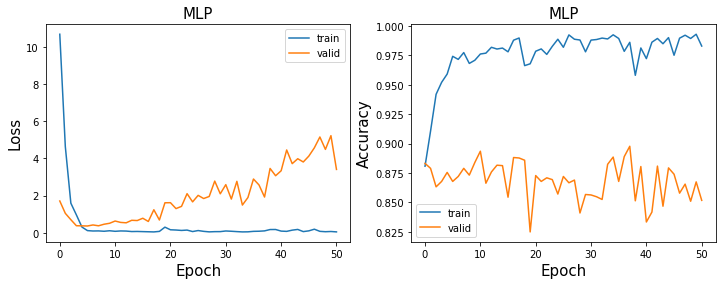

dropout:  0.5
Train loss for epoch 0: 13.97883129119873
Val loss for epoch 0: 3.0270044803619385
Train loss for epoch 1: 7.7336344718933105
Val loss for epoch 1: 2.1331534385681152
1
Train loss for epoch 2: 4.656089782714844
Val loss for epoch 2: 1.5997257232666016
2
Train loss for epoch 3: 2.714198112487793
Val loss for epoch 3: 0.7427694201469421
3
Train loss for epoch 4: 1.0241503715515137
Val loss for epoch 4: 0.558246374130249
4
Train loss for epoch 5: 0.3344581425189972
Val loss for epoch 5: 0.3952808380126953
5
Train loss for epoch 6: 0.17176470160484314
Val loss for epoch 6: 0.376097172498703
6
Train loss for epoch 7: 0.176383838057518
Val loss for epoch 7: 0.3661271631717682
7
Train loss for epoch 8: 0.12287058681249619
Val loss for epoch 8: 0.38836026191711426
Train loss for epoch 9: 0.11711952090263367
Val loss for epoch 9: 0.39036497473716736
Train loss for epoch 10: 0.1417604684829712
Val loss for epoch 10: 0.522739827632904
Train loss for epoch 11: 0.0964360460639
Val los

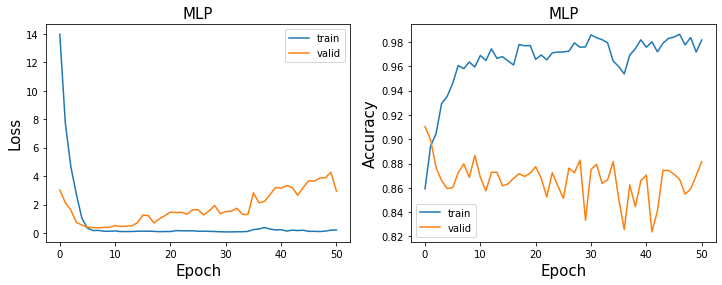

dropout:  0.7
Train loss for epoch 0: 11.328174591064453
Val loss for epoch 0: 3.2217254638671875
Train loss for epoch 1: 8.256010055541992
Val loss for epoch 1: 3.5210840702056885
Train loss for epoch 2: 8.845558166503906
Val loss for epoch 2: 3.2656195163726807
Train loss for epoch 3: 7.88150691986084
Val loss for epoch 3: 3.033323287963867
3
Train loss for epoch 4: 7.362085819244385
Val loss for epoch 4: 3.054326295852661
Train loss for epoch 5: 7.489219665527344
Val loss for epoch 5: 3.1004180908203125
Train loss for epoch 6: 6.899765968322754
Val loss for epoch 6: 3.621715784072876
Train loss for epoch 7: 6.687636852264404
Val loss for epoch 7: 3.512284517288208
Train loss for epoch 8: 6.196201324462891
Val loss for epoch 8: 3.9546725749969482
Train loss for epoch 9: 6.747381687164307
Val loss for epoch 9: 3.4666831493377686
Train loss for epoch 10: 6.810247898101807
Val loss for epoch 10: 3.591651439666748
Train loss for epoch 11: 6.116875648498535
Val loss for epoch 11: 3.576054

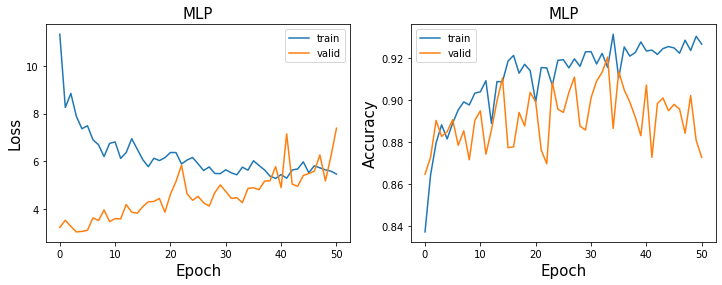

dropout:  0.9
Train loss for epoch 0: 14.41146469116211
Val loss for epoch 0: 5.408276081085205
Train loss for epoch 1: 13.602782249450684
Val loss for epoch 1: 4.6768341064453125
1
Train loss for epoch 2: 11.840255737304688
Val loss for epoch 2: 4.385004997253418
2
Train loss for epoch 3: 11.034261703491211
Val loss for epoch 3: 4.086240291595459
3
Train loss for epoch 4: 10.813913345336914
Val loss for epoch 4: 4.089271545410156
Train loss for epoch 5: 10.419453620910645
Val loss for epoch 5: 3.6299679279327393
5
Train loss for epoch 6: 10.700181007385254
Val loss for epoch 6: 4.177798748016357
Train loss for epoch 7: 10.567326545715332
Val loss for epoch 7: 4.210170745849609
Train loss for epoch 8: 10.463600158691406
Val loss for epoch 8: 4.045957088470459
Train loss for epoch 9: 10.623163223266602
Val loss for epoch 9: 4.432791233062744
Train loss for epoch 10: 10.6688814163208
Val loss for epoch 10: 4.113012790679932
Train loss for epoch 11: 10.340576171875
Val loss for epoch 11: 

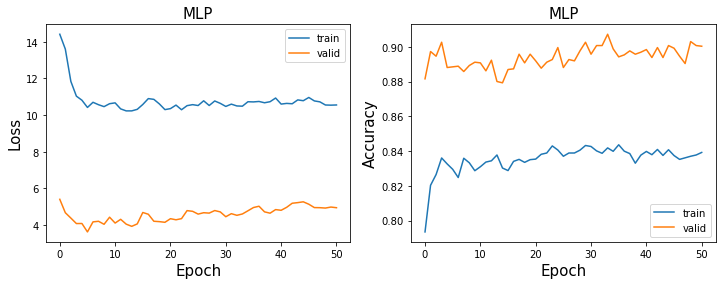

dropout:  1
Train loss for epoch 0: 0.6933994293212891
Val loss for epoch 0: 0.6913524866104126
Train loss for epoch 1: 0.6932439208030701
Val loss for epoch 1: 0.6954125761985779
Train loss for epoch 2: 0.6931860446929932
Val loss for epoch 2: 0.6972569823265076
Train loss for epoch 3: 0.6931787133216858
Val loss for epoch 3: 0.6981619596481323
Train loss for epoch 4: 0.6931595802307129
Val loss for epoch 4: 0.6998736262321472
Train loss for epoch 5: 0.6931670904159546
Val loss for epoch 5: 0.699633777141571
Train loss for epoch 6: 0.6931614875793457
Val loss for epoch 6: 0.7001166343688965
Train loss for epoch 7: 0.6931643486022949
Val loss for epoch 7: 0.7008581161499023
Train loss for epoch 8: 0.6931562423706055
Val loss for epoch 8: 0.7006915211677551
Train loss for epoch 9: 0.6931599378585815
Val loss for epoch 9: 0.7010816931724548
Train loss for epoch 10: 0.693160891532898
Val loss for epoch 10: 0.7012171149253845
Train loss for epoch 11: 0.693161129951477
Val loss for epoch 11

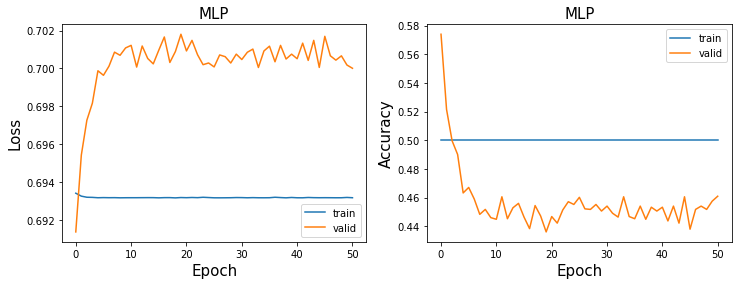

In [20]:


for d in range(0,len(dropout_all)):
    dropout = dropout_all[d]
    model = MLP(input_dim=input_dim, embed_dim=embed_dim,drop_prob = dropout).to(device)
    (data, labels, _, _, _) = next(iter(train_loader))
    data = data.to(device)
    output = model(data)
    output.shape
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    print('dropout: ', dropout)

    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, 
                                      reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, 
                                     reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if epoch == 0:
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_DO{}_EMBED{}_EPOCH{}_MODEL_{}.pt'.format(
                    save_path, model_type, CH, loss_type, reg_type, alpha, dropout, embed_dim, epoch,model_name))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_DO{}_EMBED{}_EPOCH{}_MODEL_{}.pt'.format(
                    save_path, model_type, CH, loss_type, reg_type, alpha, dropout, embed_dim, epoch,model_name))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)



In [21]:
model_MLP = os.listdir(save_path)
results = []
for x in range(0,len(model_MLP)):
    result = model_MLP[x].split('_') 
    channel = [i for i,item in enumerate(np.array(result)) if "CHall" in item]
    if not(channel):
        continue
    else:
        model_dropout = [i for i,item in enumerate(np.array(result)) if "DO" in item]
        if not(model_dropout):
            continue
        else:
            dropout = [int(i) for i in result[model_dropout[0]] if i.isdigit()]
            if len(dropout) ==2:
                dropout = dropout[1]/10
            else:
                dropout = dropout[0]
            epoch_name = [i for i,item in enumerate(np.array(result)) if "EPOCH" in item]
            res = [int(i) for i in result[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            results.append([dropout, epoch_result])

results = pd.DataFrame(np.array(results), columns=['dropout', 'epoch'])
best_results = results.groupby('dropout').max('epoch')
print(best_results)

         epoch
dropout       
0.0        7.0
0.1        3.0
0.3        5.0
0.5        7.0
0.7        3.0
0.9        5.0
1.0        0.0


In [22]:
for i,(index,row) in enumerate(best_results.iterrows()):
    model = MLP().to(device)
    path = save_path
    if index == 1.0:
        index = 1
    DO = index
    best_epoch = int(row)
    ## Load best model
    model = MLP(input_dim=input_dim, embed_dim=embed_dim).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_DO{}_EMBED{}_EPOCH{}_MODEL_{}.pt'.format(
    save_path, model_type, CH, loss_type, reg_type, alpha, DO, embed_dim, best_epoch,model_name)))
    print('{}/{}_CH{}_LOSS{}_REG{}{}_DO{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha,DO, best_epoch))
    
    # Print Shape
    w1 = model.linear1.weight
    print(w1.shape)
    w1 = model.linear1.weight.view(256,62,10,100)
    w2 = model.linear2.weight
    print(w1.shape, w2.shape)
    w1 = w1.detach().cpu().numpy()
    w2 = w2.detach().cpu().numpy()
    print(w1[0][0].shape)
    
    # Print feature
    print('One feature')
    plt.yticks(ticks=[0, 20, 40, 60, 80, 99], labels=[round(np.logspace(0, 2.45, 100)[i]) for i in [0, 20, 40, 60, 80, 99]])
    plt.xticks(ticks=[0, 9], labels=[1, 10])
    plt.imshow(w1[0][0].transpose(),origin='lower')
    # plt.clim(-1.5, 1.5)
    plt.colorbar()
    plt.show()
    
    # All features
    timewindow = 10
    plt.figure(figsize=(20,20))
    ylabels_list = [0,32,64,96,128,160,192,224,256] 
    for i in range(256):
        weights_sub = w1[i]
        plt.subplot(8,32,i+1)
        if i in ylabels_list:
            plt.yticks(ticks=[0, 20, 40, 60, 80, 99], labels=[round(np.logspace(0, 2.45, 100)[i]) for i in [0, 20, 40, 60, 80, 99]])
            plt.xticks(ticks=[0, timewindow-1], labels=[1, timewindow])
        else:
            plt.axis('off')
    #     plt.imshow(weights_sub)
        plt.imshow(w1[i][0].transpose(),origin='lower')
        plt.title(str(i+1))
    plt.show()
    
    
    ## Calculate accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_0 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
       
    ## Confusion matrix
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    


FileNotFoundError: [Errno 2] No such file or directory: '/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Jester_all_10s_2/Jester_ANN_models/MLP_CHall_LOSSbce_REGnone0_DO0.0_EMBED256_EPOCH7_MODEL_MLP_all_ch_Drop_03.pt'

In [ ]:
for i,(index,row) in enumerate(best_results.iterrows()):
    model = MLP().to(device)
    path = save_path
    if index == 1.0:
        index = 1
    DO = index
    best_epoch = int(row)
    ## Load best model
    model = MLP(input_dim=input_dim, embed_dim=embed_dim).to(device)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_DO{}_EMBED{}_EPOCH{}_MODEL_{}.pt'.format(
    save_path, model_type, CH, loss_type, reg_type, alpha, DO, embed_dim, best_epoch,model_name)))
    print('{}/{}_CH{}_LOSS{}_REG{}{}_DO{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha,DO, best_epoch))
    ## Predict vs truth
    val_loss, val_acc, val_preds, val_preds_probs, val_labels, val_dates, val_recs, val_times, cases_wrong_0 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('val loss:{}, val accuracy:{}, val percentage postive:{}'.format(val_loss, val_acc, np.mean(np.concatenate(val_labels))))
    plot_pred_vs_true(val_preds, val_labels, val_dates, val_recs, val_times, date_1='180409')